# Regularization

In [35]:
from neuralnetwork import Network
from neuralnetwork.datasets import nregion
from neuralnetwork.activations import absolute, relu, sigmoid

Layer: L0, Neurons: 1
Layer: L1, Neurons: 12, Weights: (12, 1), Biases: (12, 1)
Layer: L2, Neurons: 12, Weights: (12, 12), Biases: (12, 1)
Layer: L3, Neurons: 1, Weights: (1, 12), Biases: (1, 1)


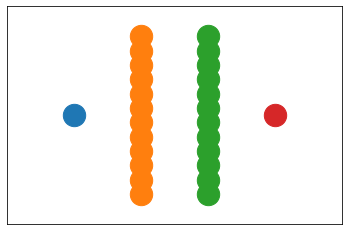

In [36]:
mynetwork = Network(1)
mynetwork.add_layer(number_of_neurons = 12 , activation=absolute)
mynetwork.add_layer(number_of_neurons = 12, activation=relu)
mynetwork.add_layer(number_of_neurons = 1, activation=sigmoid)
mynetwork.summary()

In [37]:
regions = mynetwork.layers['L1']['biases'].shape[0]
num_regions = regions // 2
num_regions

6

# Apply scoop initialization

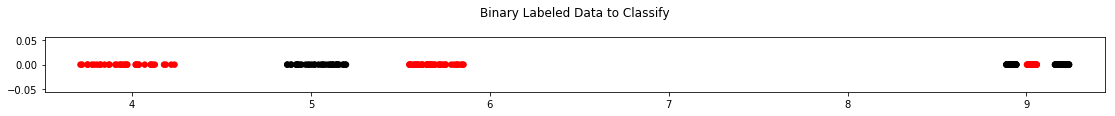

In [38]:
X_train, Y_train, X_val, Y_val, C, R = nregion.load_random_regions(regions= num_regions)
nregion.graph(X_train, Y_train)

In [39]:
len(C)

3

In [40]:
mynetwork.scoop_initialization(xmin=min(X_train), xmax= max(X_train))

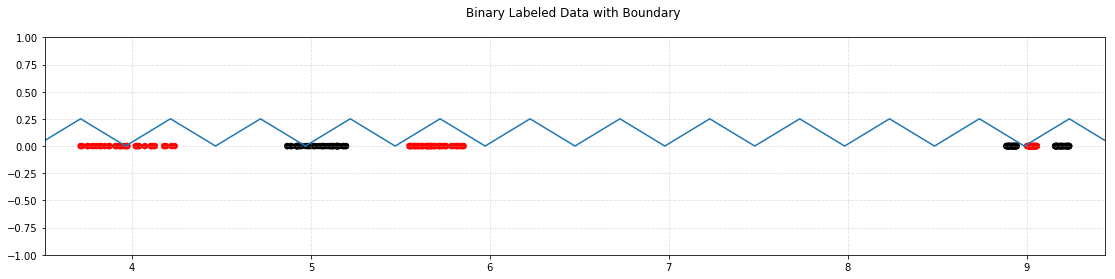

In [41]:
nregion.graph(X_train, Y_train, decision=mynetwork.decision, ylim = 1)

In [42]:
mynetwork.accuracy(X_train,Y_train)

0.5041666666666667

# APPLY REGULARIZATION

In [43]:
from neuralnetwork.optimizers import momentum, RMSprop, adam, nesterov_momentum
from neuralnetwork.regularizations import L2
num_epochs = 100
batch_size = 128
learning_rate=0.001
num_repetitions = 10

In [44]:
mynetwork.scoop_initialization(xmin=min(X_train), xmax= max(X_train))


In [27]:
from neuralnetwork.losses import binary_crossentropy_loss

In [28]:
# GRads with Regularization
grads = mynetwork.backward(X=X_train, Y=Y_train, loss_function=binary_crossentropy_loss, regularization=L2, lambd=0.1)
grads['L2']["dW"]

array([[ 0.00932525,  0.05303113,  0.11538751,  0.17774389,  0.24010027,
         0.30245665,  0.36481304,  0.42716942,  0.4895258 ,  0.55188218,
         0.61423856,  0.67659494],
       [-0.0351073 , -0.01415756, -0.06342241, -0.11268726, -0.16195211,
        -0.21121696, -0.26048181, -0.30974667, -0.35901152, -0.40827637,
        -0.45754122, -0.50680607],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [-0.00218416, -0.0076072 , -0.01303024, -0.01798242,  0.02387632,
         0.02929936,  0.0347224 ,  0.04014544,  0.04556847,  0.05099151,
         0.05641455,  0.06183759],
       [ 0.25627187,  0.19124268,  0.12621348,  0.06118429,  0.00597013,
         0.06887409,  0.13390329,  0.19893248,  0.26396167,  0.32899086,
         0.39402006,  0.45904925],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  

In [29]:
# GRads without Regularization
grads = mynetwork.backward(X=X_train, Y=Y_train, loss_function=binary_crossentropy_loss, regularization=None, lambd=0.5)
grads['L2']["dW"]

array([[ 0.00932136,  0.05300905,  0.11533946,  0.17766987,  0.24000027,
         0.30233068,  0.36466109,  0.4269915 ,  0.48932191,  0.55165232,
         0.61398273,  0.67631314],
       [-0.03509267, -0.01415166, -0.06339599, -0.11264033, -0.16188466,
        -0.21112899, -0.26037333, -0.30961766, -0.35886199, -0.40810633,
        -0.45735066, -0.50659499],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [-0.00218325, -0.00760403, -0.01302481, -0.01797493,  0.02386637,
         0.02928715,  0.03470793,  0.04012872,  0.0455495 ,  0.05097028,
         0.05639106,  0.06181184],
       [ 0.25616513,  0.19116302,  0.12616092,  0.06115881,  0.00596764,
         0.06884541,  0.13384752,  0.19884963,  0.26385173,  0.32885384,
         0.39385595,  0.45885806],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  

Loss:0.771861 Acc:0.500000 val_loss:0.762983 val_acc:0.500000: 100%|██████████| 100/100 [00:00<00:00, 2071.01it/s]


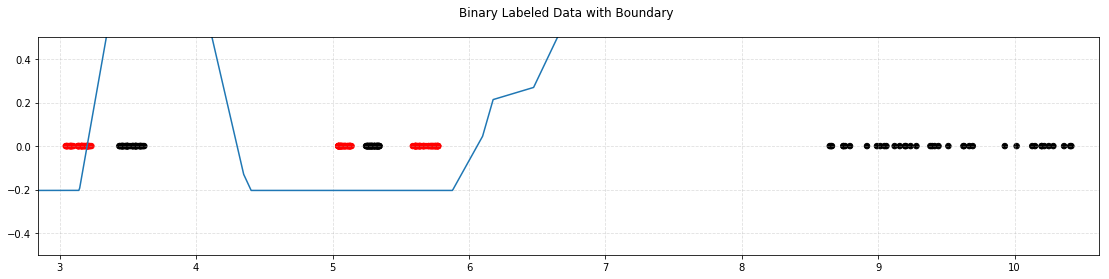

Loss:0.533782 Acc:0.779167 val_loss:0.492127 val_acc:0.850000: 100%|██████████| 100/100 [00:00<00:00, 2317.04it/s]


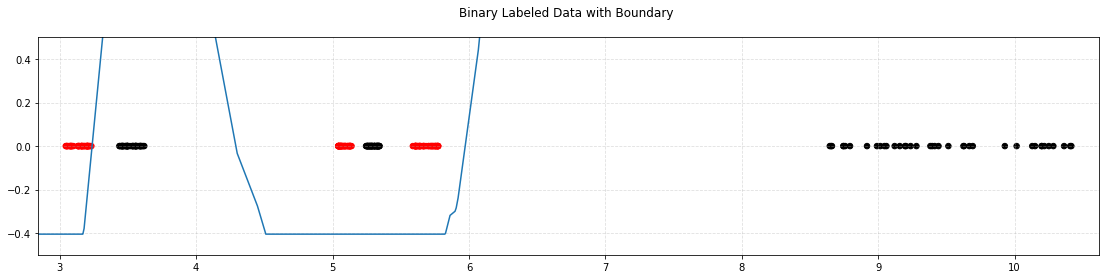

Loss:0.493043 Acc:0.820833 val_loss:0.438548 val_acc:0.883333: 100%|██████████| 100/100 [00:00<00:00, 2361.87it/s]


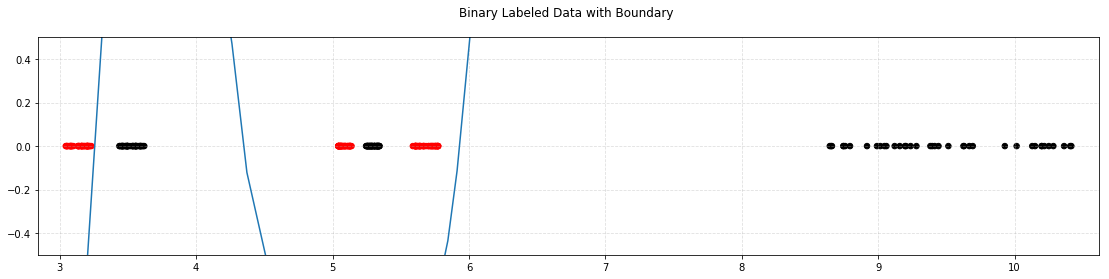

Loss:0.467594 Acc:0.820833 val_loss:0.403817 val_acc:0.883333: 100%|██████████| 100/100 [00:00<00:00, 2376.52it/s]


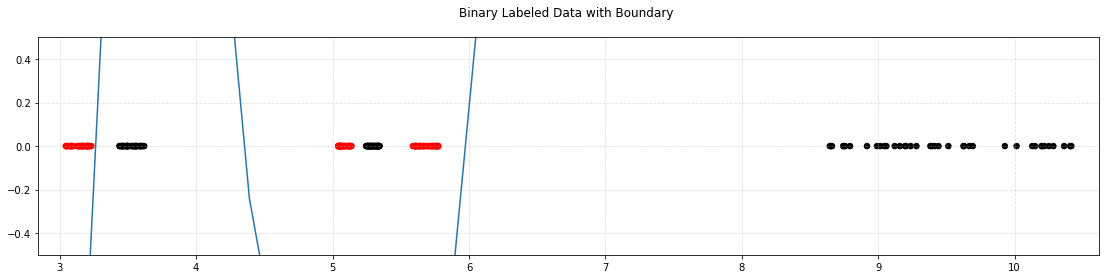

Loss:0.454702 Acc:0.820833 val_loss:0.382275 val_acc:0.883333: 100%|██████████| 100/100 [00:00<00:00, 2394.20it/s]


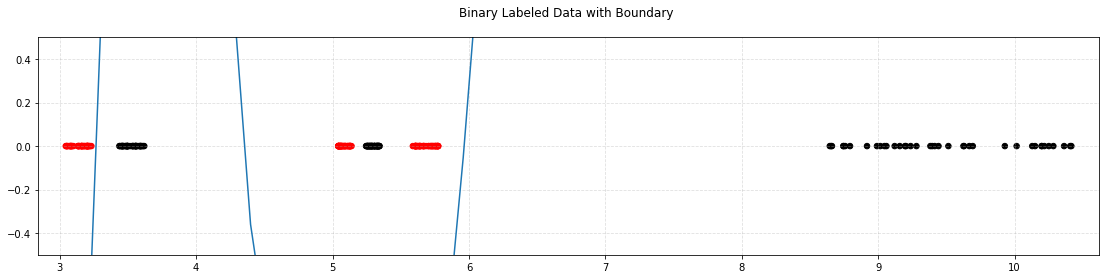

Loss:0.450258 Acc:0.820833 val_loss:0.370521 val_acc:0.883333: 100%|██████████| 100/100 [00:00<00:00, 2197.06it/s]


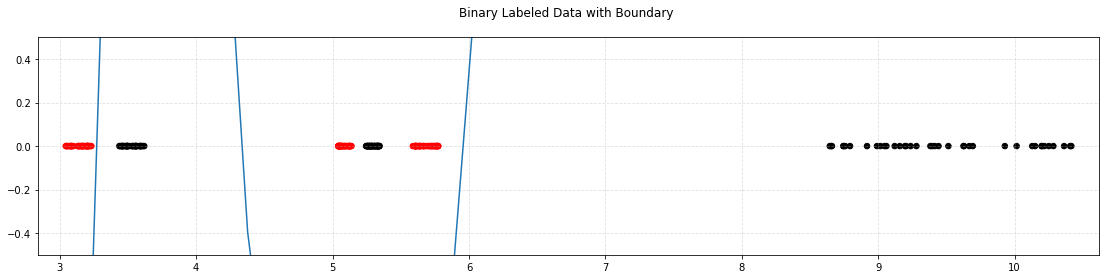

Loss:0.450542 Acc:0.820833 val_loss:0.367904 val_acc:0.883333: 100%|██████████| 100/100 [00:00<00:00, 2174.50it/s]


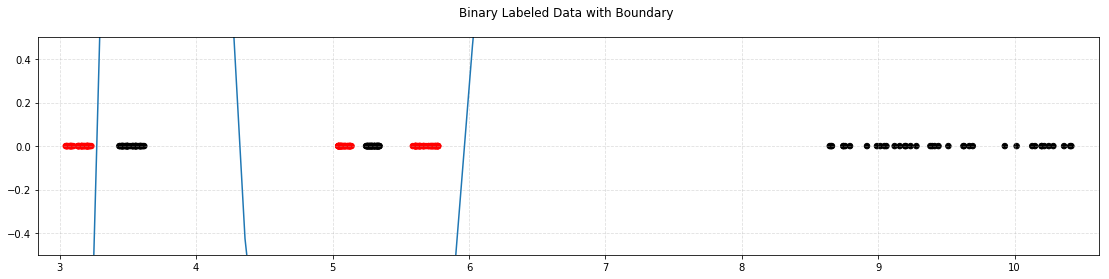

Loss:0.452573 Acc:0.820833 val_loss:0.369577 val_acc:0.883333: 100%|██████████| 100/100 [00:00<00:00, 2102.73it/s]


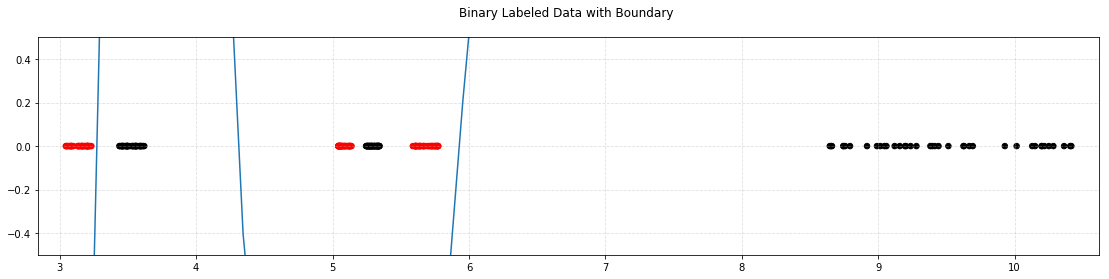

Loss:0.455203 Acc:0.820833 val_loss:0.372130 val_acc:0.883333: 100%|██████████| 100/100 [00:00<00:00, 2218.46it/s]


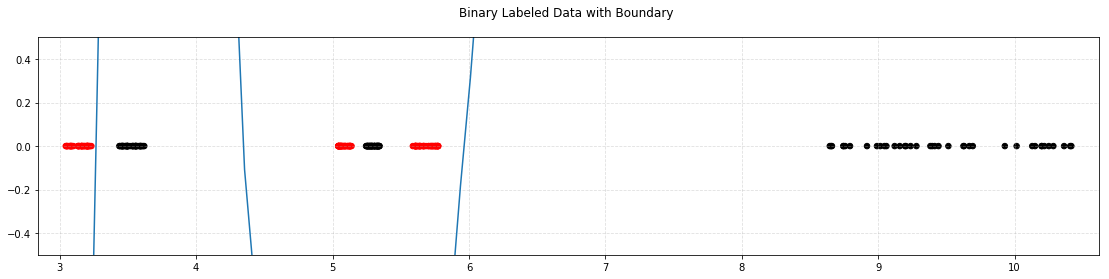

Loss:0.457812 Acc:0.820833 val_loss:0.374610 val_acc:0.883333: 100%|██████████| 100/100 [00:00<00:00, 2122.58it/s]


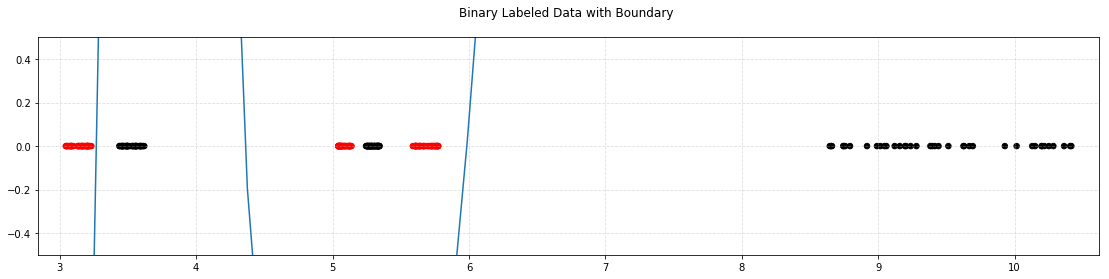

In [32]:
mynetwork.scoop_initialization(xmin=min(X_train), xmax= max(X_train))
# Adam
for i in range(num_repetitions):
    mynetwork.fit(X_train, Y_train, batch_size=batch_size, num_epochs=num_epochs, learning_rate=learning_rate, validation_data=(X_val, Y_val), optimizer = RMSprop, beta = 0.9, regularization= L2 , lambd = 0.5)
    nregion.graph(X_train, Y_train, decision=mynetwork.decision, ylim = 0.5)

# Without Regularization

Loss:0.734361 Acc:0.500000 val_loss:0.725483 val_acc:0.500000: 100%|██████████| 100/100 [00:00<00:00, 2337.47it/s]


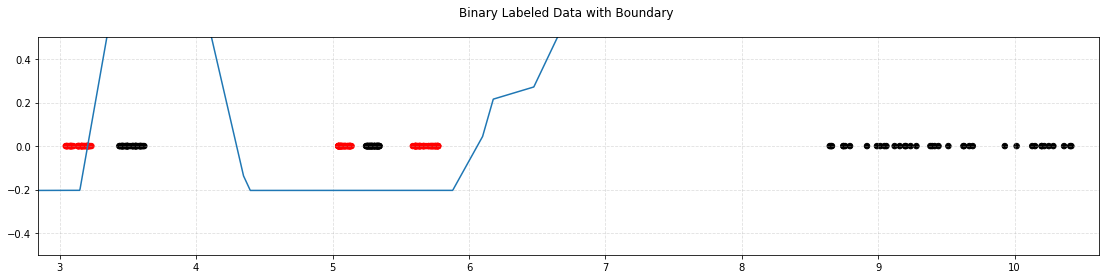

Loss:0.493162 Acc:0.795833 val_loss:0.451578 val_acc:0.850000: 100%|██████████| 100/100 [00:00<00:00, 2522.87it/s]


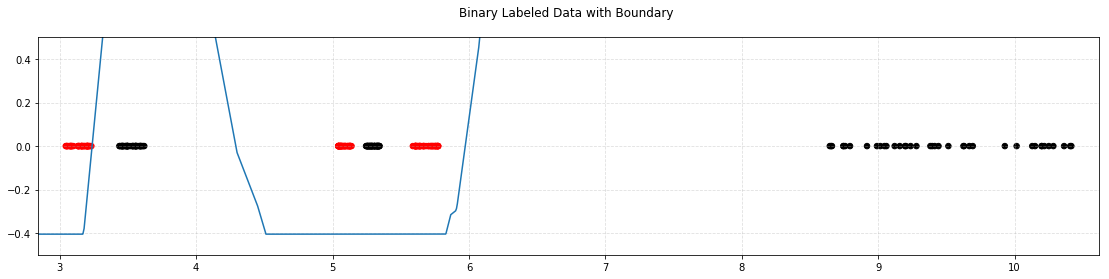

Loss:0.449044 Acc:0.820833 val_loss:0.394553 val_acc:0.883333: 100%|██████████| 100/100 [00:00<00:00, 2454.23it/s]


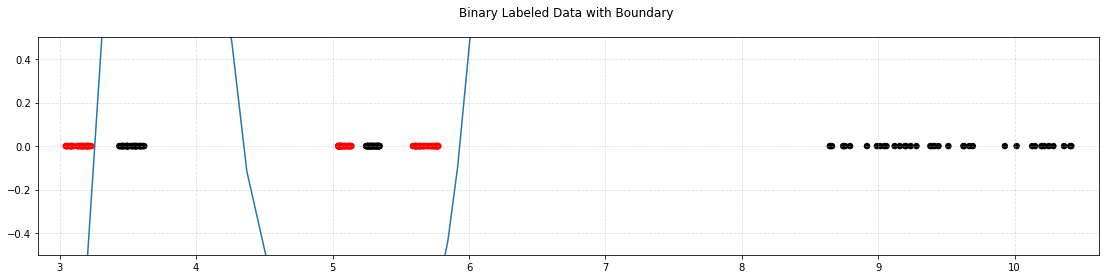

Loss:0.420408 Acc:0.820833 val_loss:0.356636 val_acc:0.883333: 100%|██████████| 100/100 [00:00<00:00, 2507.39it/s]


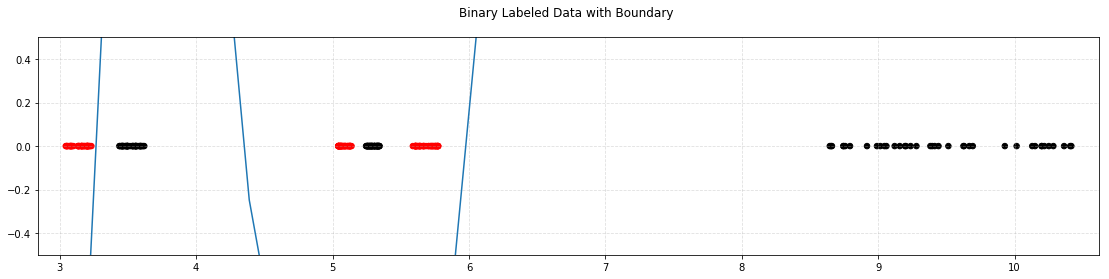

Loss:0.404330 Acc:0.820833 val_loss:0.331937 val_acc:0.883333: 100%|██████████| 100/100 [00:00<00:00, 2342.01it/s]


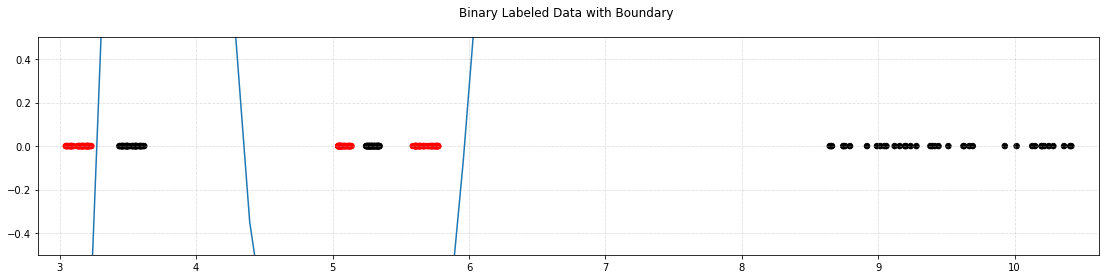

Loss:0.396745 Acc:0.820833 val_loss:0.316639 val_acc:0.883333: 100%|██████████| 100/100 [00:00<00:00, 2386.84it/s]


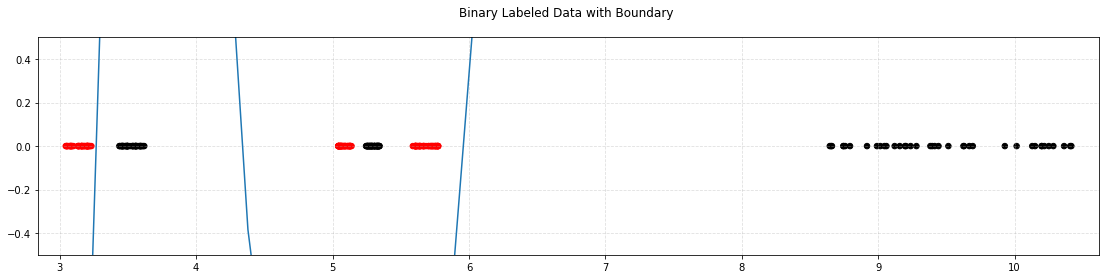

Loss:0.394219 Acc:0.820833 val_loss:0.311706 val_acc:0.883333: 100%|██████████| 100/100 [00:00<00:00, 2310.22it/s]


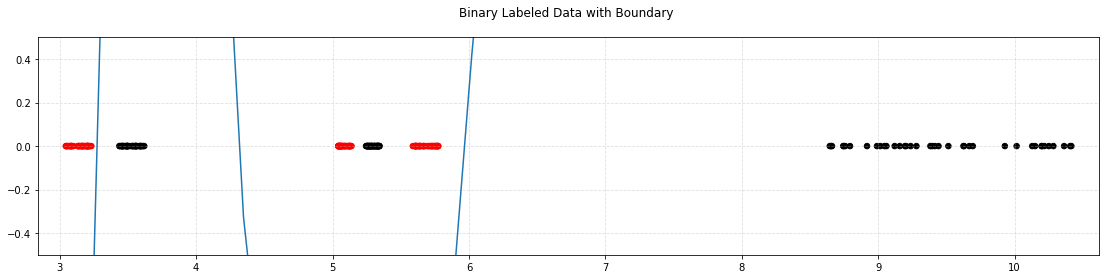

Loss:0.392868 Acc:0.820833 val_loss:0.309927 val_acc:0.883333: 100%|██████████| 100/100 [00:00<00:00, 2158.86it/s]


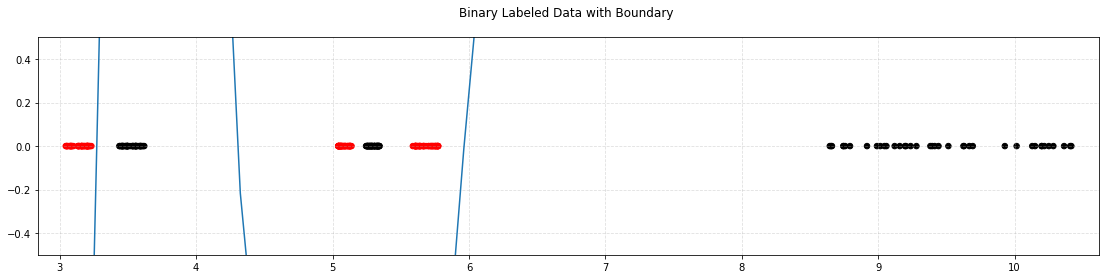

Loss:0.392361 Acc:0.820833 val_loss:0.309282 val_acc:0.883333: 100%|██████████| 100/100 [00:00<00:00, 2494.74it/s]


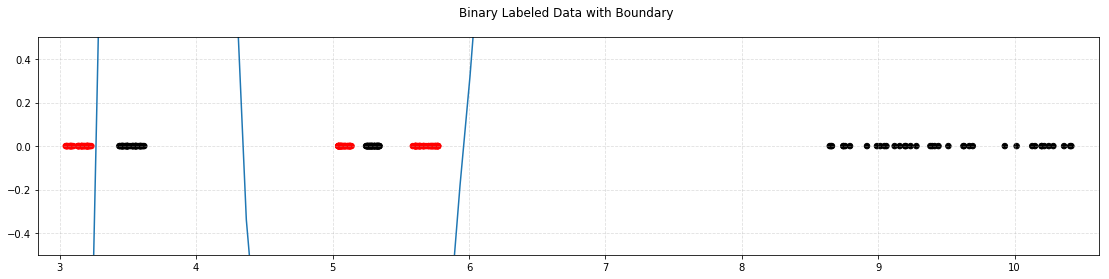

Loss:0.392163 Acc:0.820833 val_loss:0.309002 val_acc:0.883333: 100%|██████████| 100/100 [00:00<00:00, 2034.93it/s]


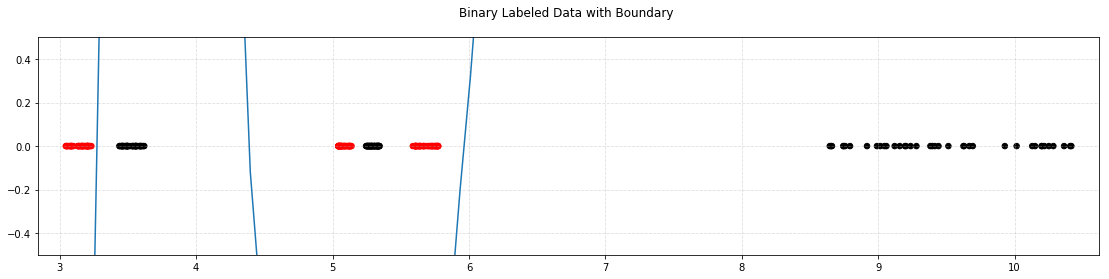

In [34]:
mynetwork.scoop_initialization(xmin=min(X_train), xmax= max(X_train))
# Adam
for i in range(num_repetitions):
    mynetwork.fit(X_train, Y_train, batch_size=batch_size, num_epochs=num_epochs, learning_rate=learning_rate, validation_data=(X_val, Y_val), optimizer = RMSprop, beta = 0.9, regularization= None)
    nregion.graph(X_train, Y_train, decision=mynetwork.decision, ylim = 0.5)